In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import plotly.graph_objects as go

DANMENG SECTION 

In [250]:
employment=pd.read_csv('employment.csv')

In [251]:
employment.drop(columns=['12-month percent change in employment', '12-month net change in employment (thousands)'], inplace=True)

In [252]:
# function to standardize the values of the total employment column
def standardize(s):
    if ',' in s:
        s=s.replace(',', '')
    s=float(s)*1000
    return s

In [253]:
employment.rename(columns={'Total employment (thousands)': 'Total employment'}, inplace=True)
employment['Total employment']=employment['Total employment'].apply(standardize)

<Axes: ylabel='Total employment'>

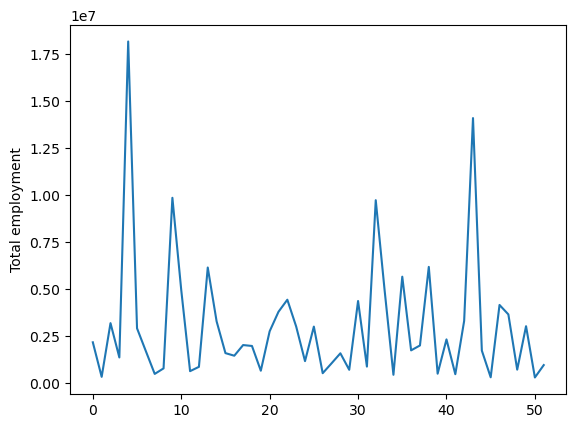

In [254]:
# lineplot of total employment by state index
sns.lineplot(x=employment.index, y='Total employment', data=employment)

<Axes: ylabel='Total employment'>

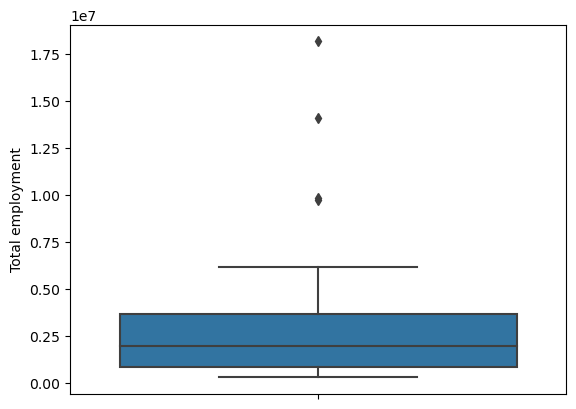

In [255]:
# boxplot of the total employment
sns.boxplot(y='Total employment', data=employment)

In [256]:
# Find the outliers of the total employment dataset
def outlier(data):
    outlier=[]
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    upper_bound = np.percentile(data, 75) + 1.5 * IQR
    lower_bound = np.percentile(data, 25) - 1.5 * IQR
    for i in data:
        if i>upper_bound:
            outlier.append(i)
        if i<lower_bound:
            outlier.append(i)
    return outlier
outliers = outlier(employment['Total employment'])
outliers

[18180700.0, 9860700.0, 9732900.0, 14103300.0]

In [257]:
employment_outlier = employment.loc[employment['Total employment'].isin(outliers)]
employment_outlier

,State,Total employment
4,California,18180700.0
9,Florida,9860700.0
32,New York,9732900.0
43,Texas,14103300.0


In [258]:
# read in the CSV file of the population by states dataset
population=pd.read_csv('US population by states.csv')

In [259]:
# Function to standardize the States column
def remove(s):
    if '.' in s:
        s=s.replace('.','')
    return s
population['States']=population['States'].apply(remove)
# function to standardize the numerical columns
def standardize2(s):
    if ',' in s:
        s=s.replace(',','')
    s=float(s)
    return s
population['2020 Estimate Base']=population['2020 Estimate Base'].apply(standardize2)
population['2020']=population['2020'].apply(standardize2)
population['2021']=population['2021'].apply(standardize2)
population['2022']=population['2022'].apply(standardize2)
population['2023']=population['2023'].apply(standardize2)

In [260]:
# Create a new dataframe containing the data of the employment rate by states
employment_rate=pd.DataFrame()
employment_rate['State']=employment['State']
employment_rate['Total employment']=employment['Total employment']/population['2023']

<Axes: xlabel='Total employment', ylabel='Count'>

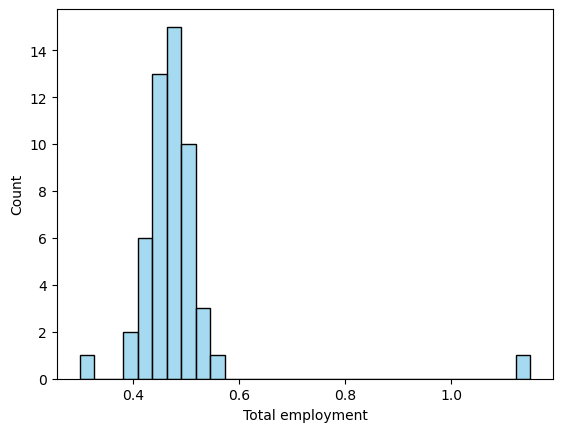

In [261]:
# histogram of the employment rate by states
sns.histplot(employment_rate['Total employment'], color='skyblue')

<Axes: ylabel='Total employment'>

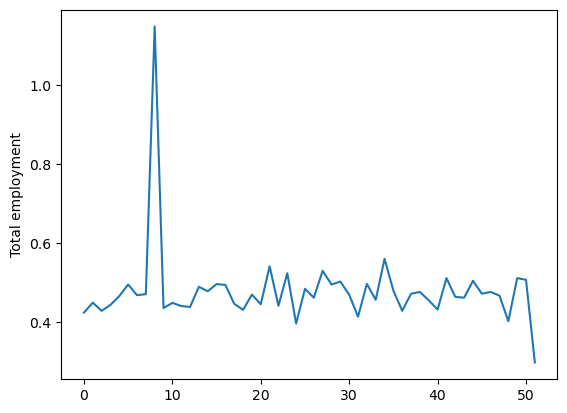

In [262]:
# line plot of the employment rate by states
sns.lineplot(x=employment_rate.index, y='Total employment', data=employment_rate)

In [263]:
# Find the state with abnormal employment rate
abnormal = employment_rate.loc[employment_rate['Total employment']>1]
abnormal

,State,Total employment
8,District of Columbia,1.14909


In [264]:
employment_rate.rename(columns={'Total employment': 'Employment rate'}, inplace=True)

ARYS SECTION

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

house_prices_data = pd.read_csv('house_prices_state.csv')

state_abbrev_to_full = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

house_prices_data['State'] = house_prices_data['State'].map(state_abbrev_to_full)
house_prices_data

,State,Total Homes Sold,Adjusted Average Homes Sold,Adjusted Average New Listings,Adjusted Pending Sales
0,Alaska,287.541059,50.978444,62.493596,35.979387
1,Alabama,191.081433,33.849442,35.440730,20.136003
2,Arkansas,102.111147,18.048895,20.010722,12.584891
3,Arizona,1362.660837,242.484625,269.004011,190.830365
4,California,914.266376,162.816600,188.150745,132.069873
5,Colorado,289.864085,51.565790,57.551616,42.583446
6,Connecticut,798.096977,142.204971,172.212534,95.820584
7,Delaware,650.021277,115.700215,131.362897,86.394693
8,Florida,977.746535,174.400143,207.661572,123.671110
9,Georgia,101.861066,17.968301,20.505561,11.416835


                                 OLS Regression Results                                
Dep. Variable:     Adjusted Average Homes Sold   R-squared:                       0.002
Model:                                     OLS   Adj. R-squared:                 -0.019
Method:                          Least Squares   F-statistic:                   0.08128
Date:                         Sat, 09 Mar 2024   Prob (F-statistic):              0.777
Time:                                 19:54:47   Log-Likelihood:                -269.66
No. Observations:                           50   AIC:                             543.3
Df Residuals:                               48   BIC:                             547.2
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

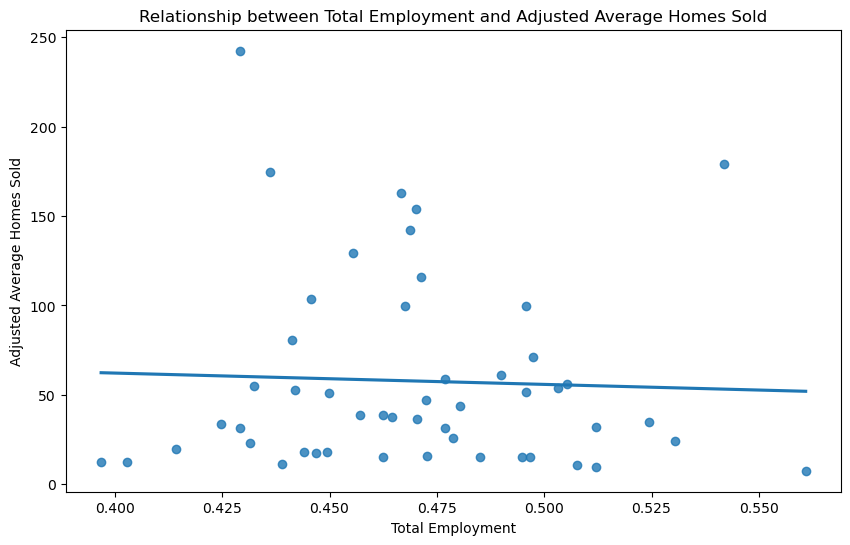

In [280]:
#Merge the datasets on 'State', ensuring only matching states are included
merged_data = pd.merge(employment_rate, house_prices_data, on='State')

#linear regression analysis between 'Total employment' (rate) and 'Adjusted Average Homes Sold'
X = merged_data[['Employment rate']]  # Predictor
Y = merged_data['Adjusted Average Homes Sold']  # Response

#converting x and y to numeric
merged_data['Employment rate'] = pd.to_numeric(merged_data['Employment rate'], errors='coerce')
merged_data['Adjusted Average Homes Sold'] = pd.to_numeric(merged_data['Adjusted Average Homes Sold'], errors='coerce')

#Handling any potential NaN values that could disrupt the regression analysis
merged_data.dropna(subset=['Employment rate', 'Adjusted Average Homes Sold'], inplace=True)

#Now, assign X and Y from the cleaned merged_data
X = merged_data[['Employment rate']]  # Predictor
Y = merged_data['Adjusted Average Homes Sold']  # Response

X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(Y, X).fit()
print(model.summary())

#Visualizing the relationship with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Employment rate', y='Adjusted Average Homes Sold', data=merged_data, ci=None)
plt.title('Relationship between Total Employment and Adjusted Average Homes Sold')
plt.xlabel('Total Employment')
plt.ylabel('Adjusted Average Homes Sold')
plt.show()

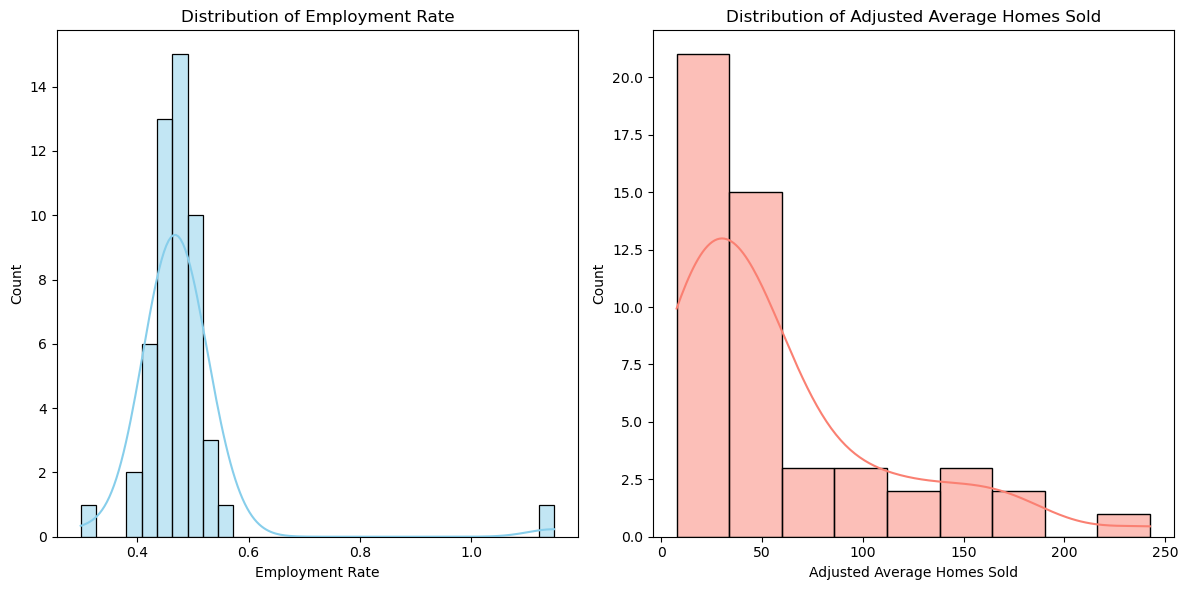

In [281]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(employment_rate['Employment rate'], kde=True, color='skyblue')
plt.title('Distribution of Employment Rate')
plt.xlabel('Employment Rate')

plt.subplot(1, 2, 2)
sns.histplot(merged_data['Adjusted Average Homes Sold'], kde=True, color='salmon')
plt.title('Distribution of Adjusted Average Homes Sold')
plt.xlabel('Adjusted Average Homes Sold')

plt.tight_layout()
plt.show()

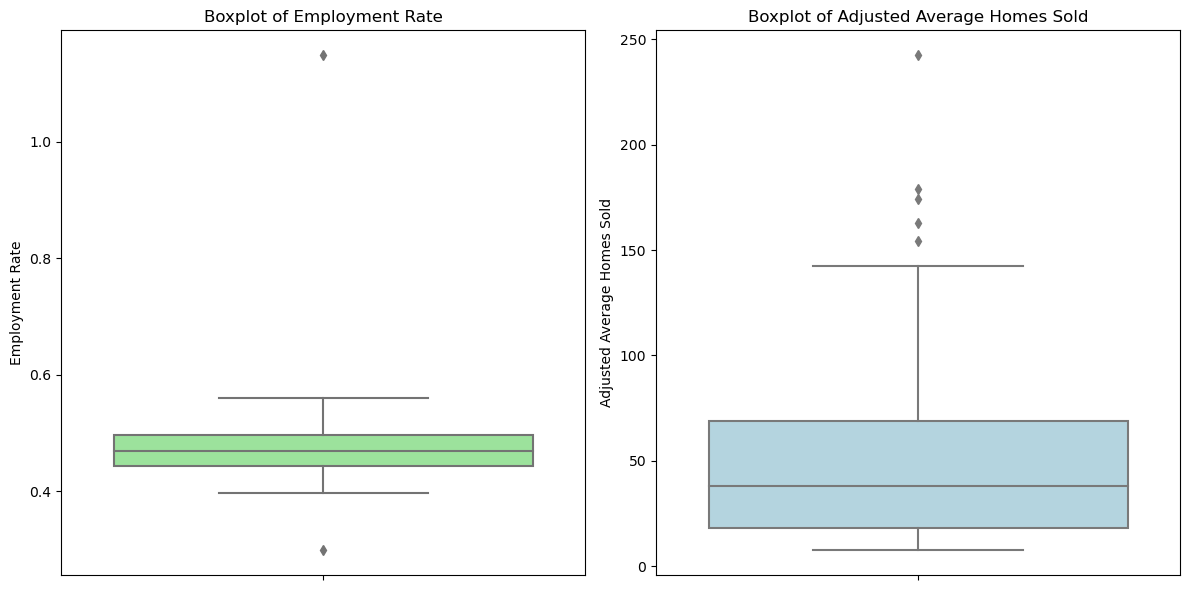

In [282]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=employment_rate['Employment rate'], color='lightgreen')
plt.title('Boxplot of Employment Rate')
plt.ylabel('Employment Rate')

plt.subplot(1, 2, 2)
sns.boxplot(y=merged_data['Adjusted Average Homes Sold'], color='lightblue')
plt.title('Boxplot of Adjusted Average Homes Sold')
plt.ylabel('Adjusted Average Homes Sold')

plt.tight_layout()
plt.show()

CYNTHIA SECTION

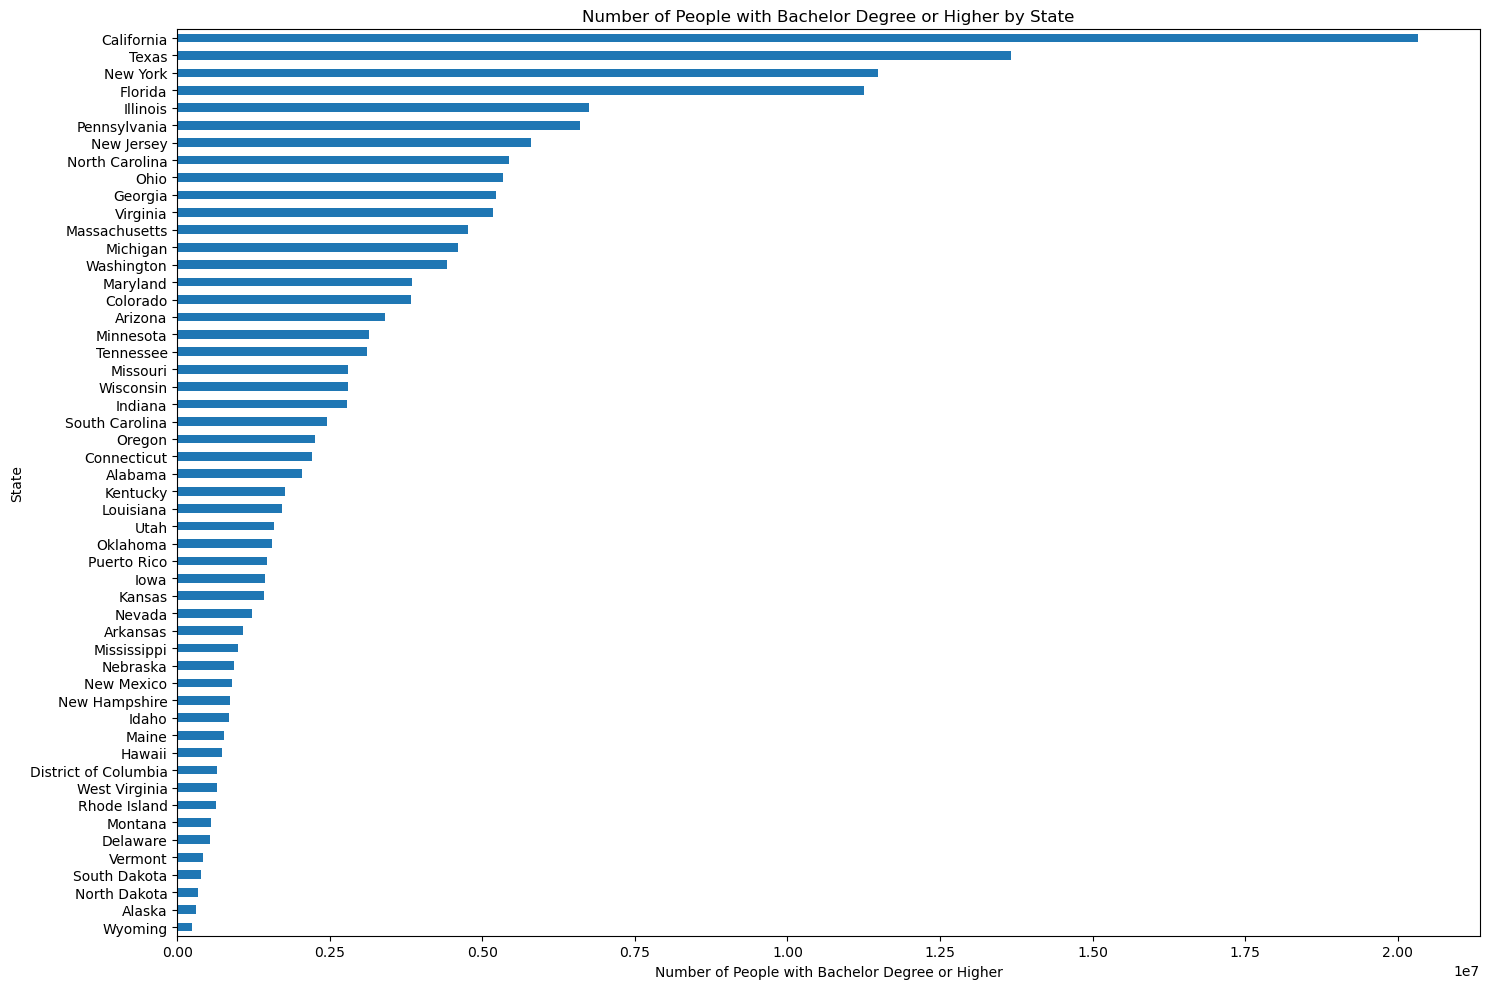

In [270]:
educational_level = pd.read_csv('educational_level.csv').set_index('State')
plt.figure(figsize=(15, 10))
educational_level['bachelor_or_higher'].sort_values().plot(kind='barh')
plt.xlabel('Number of People with Bachelor Degree or Higher')
plt.title('Number of People with Bachelor Degree or Higher by State')
plt.tight_layout()
plt.show()

In [283]:
#Read employment dataframe
employment_rate = pd.read_csv('employment_rate.csv')
employment_rate
#Display the first few rows to verify
employment_rate.head()
educational_level['State'] = np.array(employment_rate['State'])
educational_level
combined_data = pd.merge(educational_level, employment_rate, on='State')
combined_data
#Plotting the regression plot for educational level vs total employment
plt.figure(figsize=(10, 6))
sns.regplot(data=combined_data, x='bachelor_or_higher', y='Employment rate', scatter_kws={'s': 100})
plt.title('Impact of Educational Level on Employment Rate')
plt.xlabel('Number of People with Bachelor Degree or Higher')
plt.ylabel('Employment rate')
plt.grid(True)
plt.show()

ValueError: 'State' is both an index level and a column label, which is ambiguous.

The regression line has a positive slope, which suggests that there is a positive correlation between 
the number of people with a bachelor's degree or higher and the employment rate. This indicates that
 as the number of individuals with higher education increases, the employment rate tends to increase as well.

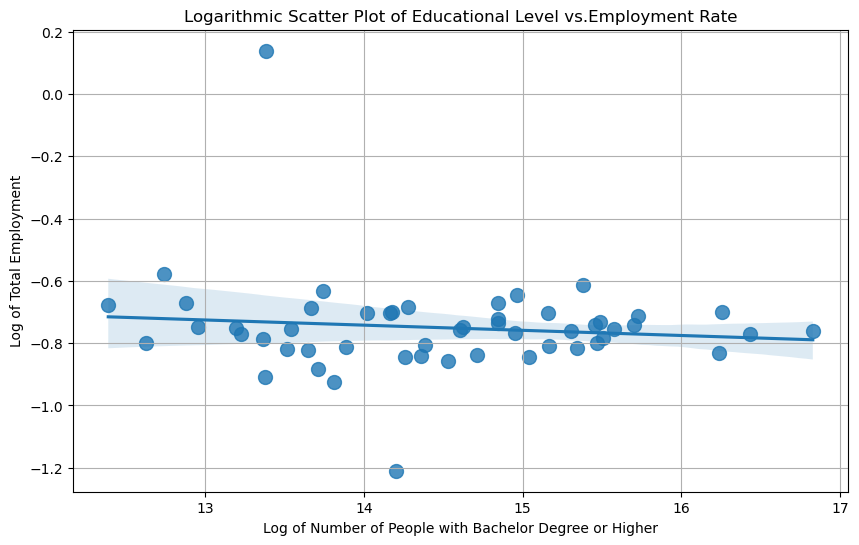

In [ ]:
combined_data['log_bachelor_or_higher'] = np.log(combined_data['bachelor_or_higher'])
combined_data['log_Employment_rate'] = np.log(combined_data['Employment rate'])
#Plotting the logarithmic scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(
    x='log_bachelor_or_higher', 
    y='log_Employment_rate', 
    data=combined_data, 
    scatter_kws={'s': 100}
)

plt.title('Logarithmic Scatter Plot of Educational Level vs.Employment Rate')
plt.xlabel('Log of Number of People with Bachelor Degree or Higher')
plt.ylabel('Log of Total Employment')
plt.grid(True)
plt.show()


The data points are spread out across a wide range of values on both axes, 
which implies significant variation in both the number of people with a 
bachelor's degree or higher and total employment among the different entities represented.

JESSICA SECTION 

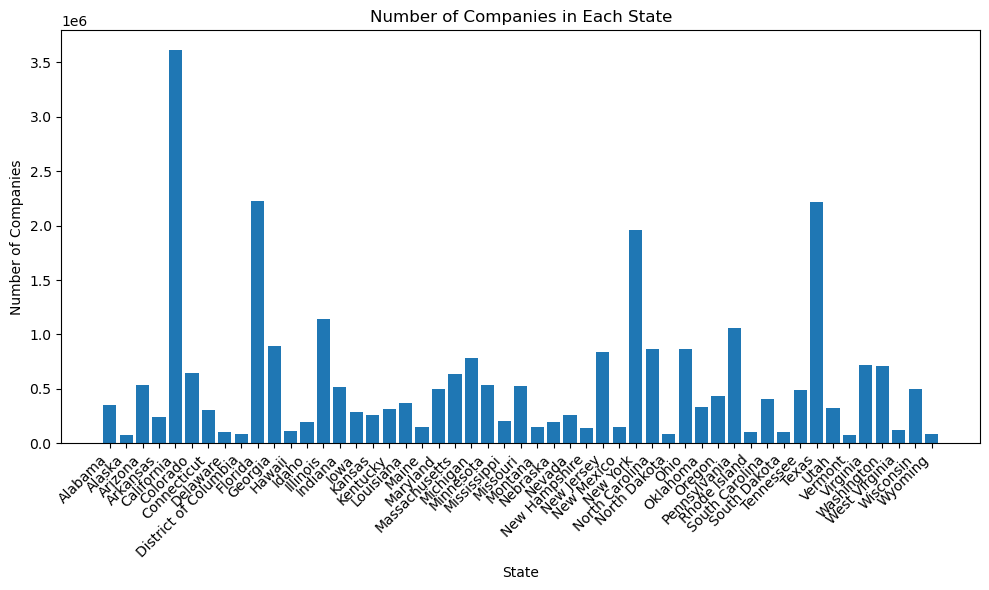

In [278]:
df = pd.read_excel('us_state_naics_detailedsizes_2021.xlsx', header=2)
total_comp = df[(df['NAICS Description'] == 'Total') & (df['State Name'] != 'United States')]
comp_num = total_comp.groupby('State Name')['Establishments'].sum()

state_abbr_map = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

comp_df = pd.DataFrame(comp_num)
comp_df.reset_index(inplace=True)
comp_df.columns = ['State Name', 'Establishments']
comp_df['Establishments'] = comp_df['Establishments'].astype(float)
comp_df['State Abbreviation'] = comp_df['State Name'].map(state_abbr_map)

state_names = pd.Series(comp_num.index.tolist())
establishments = pd.Series(comp_num.tolist())

plt.figure(figsize=(10, 6))
plt.bar(state_names, establishments)
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.title('Number of Companies in Each State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
fig = go.Figure(data=go.Choropleth(
    locations=comp_df['State Abbreviation'],
    z=comp_df['Establishments'],
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    marker_line_color='white',
    colorbar_title='Number of Companies'
))

fig.update_layout(
    title_text='Number of Companies in Each State',
    geo_scope='usa'
)


fig.show()

In [ ]:
comp_df

,State Name,Establishments,State Abbreviation
0,Alabama,353946.0,AL
1,Alaska,77598.0,AK
2,Arizona,539751.0,AZ
3,Arkansas,237603.0,AR
4,California,3614650.0,CA
5,Colorado,645582.0,CO
6,Connecticut,310086.0,CT
7,Delaware,100115.0,DE
8,District of Columbia,81097.0,NaN
9,Florida,2227843.0,FL


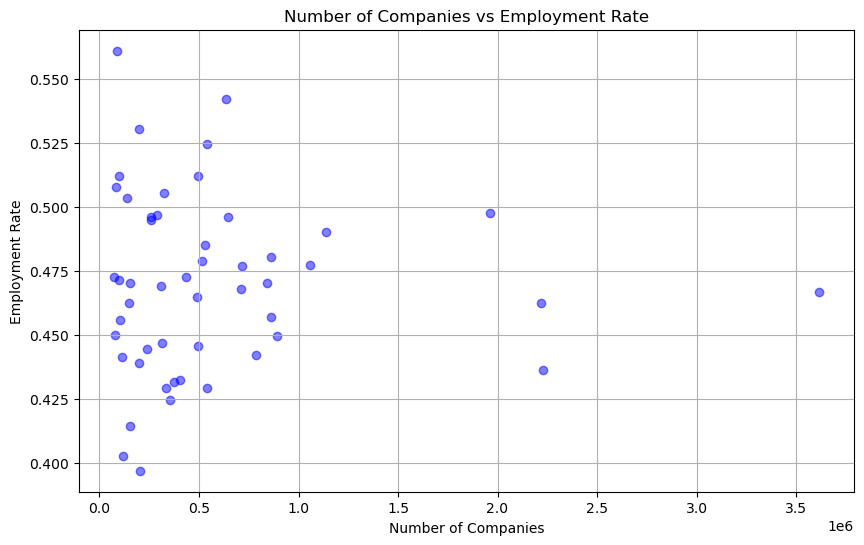

In [ ]:
employment_rate.drop(51, inplace=True)
employment_rate.drop(8,inplace=True)
comp_df.drop(8,inplace=True)
plt.figure(figsize=(10, 6))
plt.scatter(comp_df['Establishments'], employment_rate['Employment rate'], color='blue', alpha=0.5)
plt.title('Number of Companies vs Employment Rate')
plt.xlabel('Number of Companies')
plt.ylabel('Employment Rate')
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm

comp_df.rename(columns={'State Name': 'State'},inplace=True)
merged = comp_df.merge(employment_rate, on='State')
merged
X = merged['Establishments']
y = merged['Employment rate']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Employment rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                  0.008634
Date:                Sat, 09 Mar 2024   Prob (F-statistic):              0.926
Time:                        17:15:51   Log-Likelihood:                 97.266
No. Observations:                  50   AIC:                            -190.5
Df Residuals:                      48   BIC:                            -186.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4701      0.007     70.

MEGHA + KEVIN 

In [272]:
df = pd.read_csv('real_estate_db.csv', encoding='latin1' )

In [273]:
# Group the DataFrame by 'state_ab'
grouped = df.groupby('state_ab')

# Calculate the average income of the population by states
average_income_by_state = grouped['hi_mean'].mean()

In [274]:
needed_columns = ['state', 'debt', 'hi_mean', 'family_mean', 'rent_mean']
grouped_data = df[needed_columns].groupby('state').mean().reset_index()
grouped_data


,state,debt,hi_mean,family_mean,rent_mean
0,Alabama,0.546932,55919.913444,65274.351136,764.950875
1,Alaska,0.597279,83541.334071,91911.137518,1190.093590
2,Arizona,0.644434,66474.487841,72967.179004,1085.995326
3,Arkansas,0.539289,55027.720981,64477.549439,715.227833
4,California,0.720337,82014.309082,87604.860152,1468.453183
5,Colorado,0.715926,79159.770834,87957.083960,1197.980483
6,Connecticut,0.686103,92807.007265,103187.509928,1314.159088
7,Delaware,0.680096,74435.832252,84135.131222,1103.488103
8,District of Columbia,0.774261,90667.269509,107484.346560,1459.425053
9,Florida,0.586009,63868.753519,72413.453858,1143.950813


/var/folders/mn/d7t_57d93vb42d0012bqbpd80000gn/T/ipykernel_10727/2171165153.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



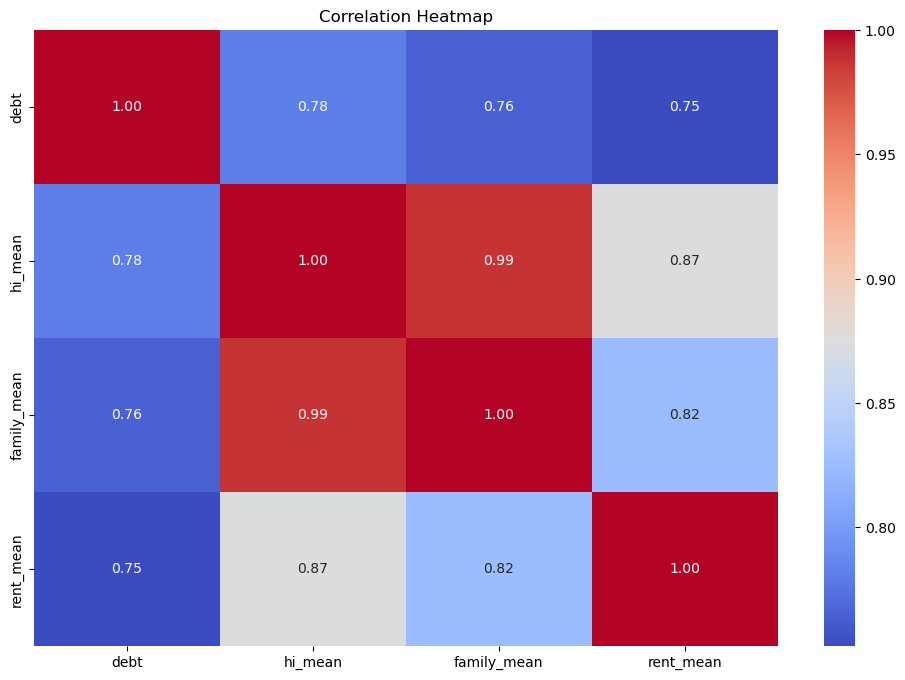

In [275]:
corr_matrix = grouped_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                hi_mean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1286.
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           7.88e-46
Time:                        19:53:28   Log-Likelihood:                -448.67
No. Observations:                  52   AIC:                             905.3
Df Residuals:                      48   BIC:                             913.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3646.0429   1748.796     -2.085      

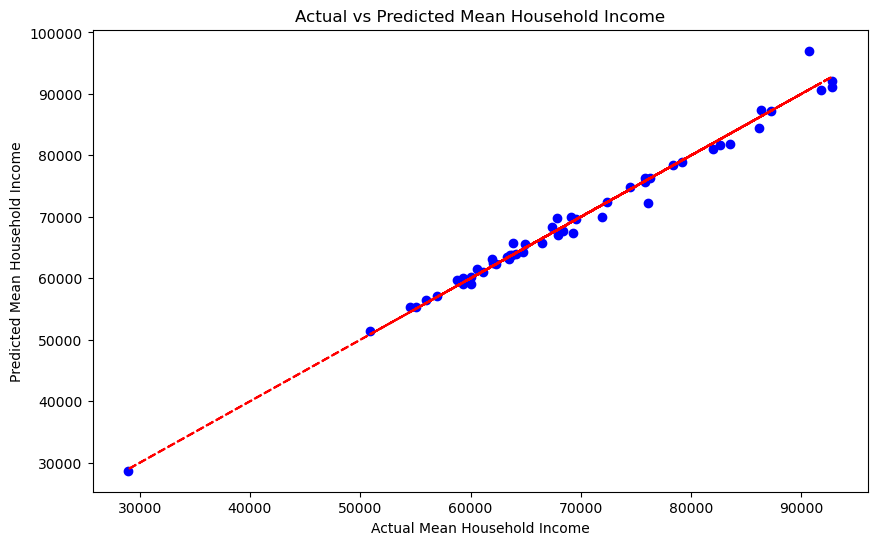

In [276]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define independent and dependent variables
X = grouped_data[['family_mean', 'rent_mean', 'debt']]  # Independent variables
y = grouped_data['hi_mean']  # Dependent variable

# Add a constant term to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['hi_mean'], model.predict(X), color='blue')
plt.plot(grouped_data['hi_mean'], grouped_data['hi_mean'], color='red', linestyle='--')
plt.title('Actual vs Predicted Mean Household Income')
plt.xlabel('Actual Mean Household Income')
plt.ylabel('Predicted Mean Household Income')
plt.show()

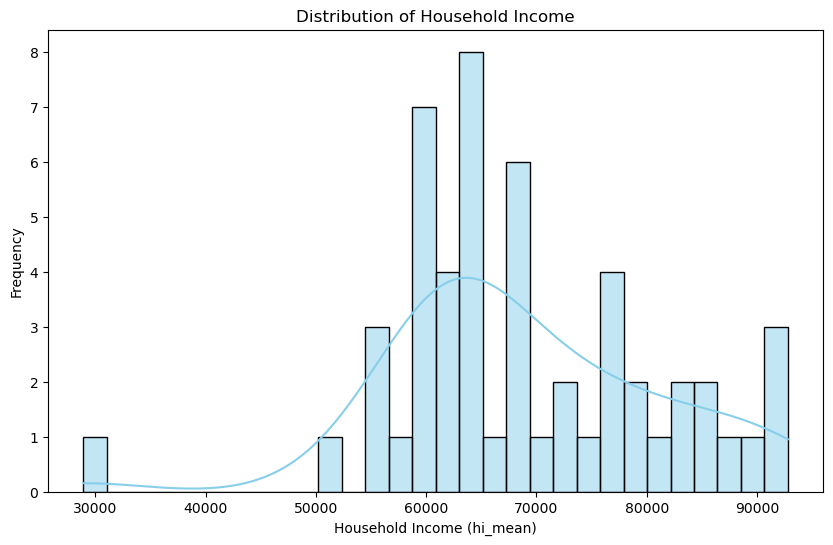

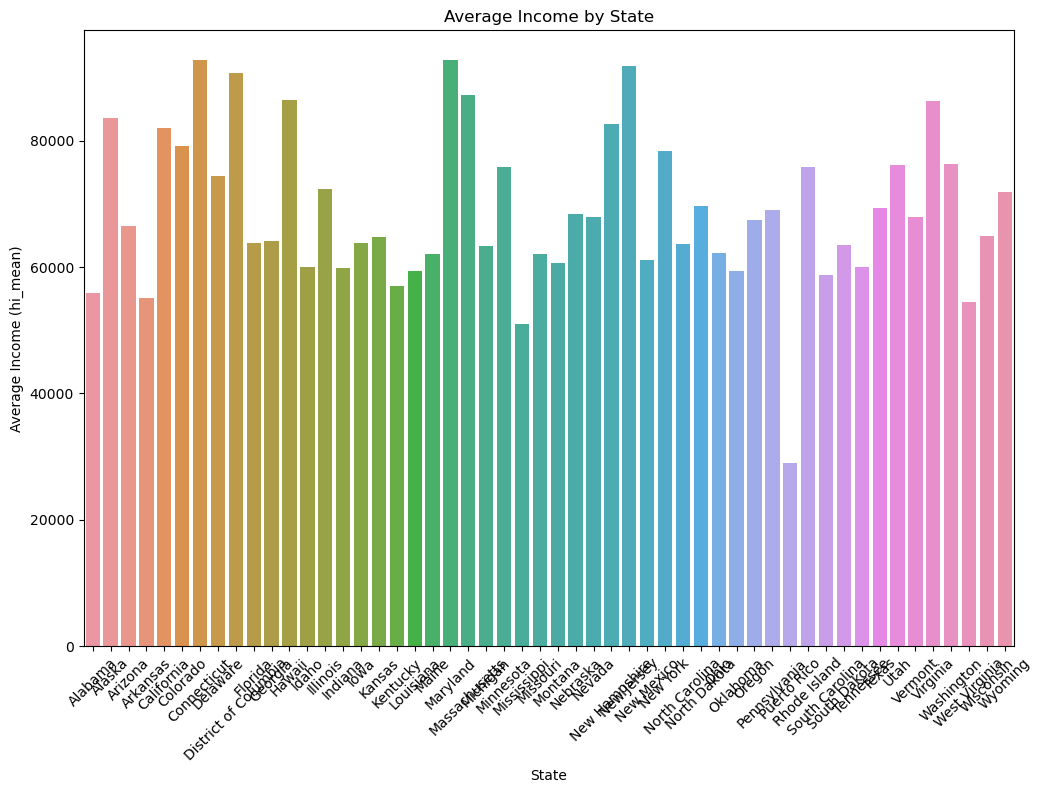

In [277]:
# Histogram of Household Income (hi_mean)
plt.figure(figsize=(10, 6))
sns.histplot(data=grouped_data, x='hi_mean', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Household Income')
plt.xlabel('Household Income (hi_mean)')
plt.ylabel('Frequency')
plt.show()

# Bar Chart of Average Income by State
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='state', y='hi_mean', estimator=sum)
plt.title('Average Income by State')
plt.xlabel('State')
plt.ylabel('Average Income (hi_mean)')
plt.xticks(rotation=45)
plt.show()